<a href="https://colab.research.google.com/github/patty-13/MSML-603-UMD-MACHINE-LEARNING/blob/main/HW7_PRATYUSH_SETHI_119344675.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression; A brief review

Consider the set
 $D = \{ ({\bf x}_{1}, y_1), ({\bf x}_{2}, y_2), \cdots, ({\bf x}_{N}, y_N) \} $, where $y_i \in \{0, 1\}$ is the label, and ${\bf x}_i \in \mathbb{R}^d$ is a $d$ dimensional feature vector. The goal is to find the linear decision rule 
 $$
{\bf w^*}^T x \underset{\omega_0}{\overset{\omega_1}{\gtrless}} 0
 $$ 
 such that 
 $$
 \begin{align}
 {\bf w^*} & = \underset{\bf w}{argmin} ~~ J({\bf w}) \\
           & = \underset{\bf w}{argmin} ~~\frac{1}{N}\sum_{i=1}^N  C({\bf x}_i , {\bf w})
 \end{align}
 $$
 where 
 
 $$
 C({\bf x}_i , {\bf w}) = -y_i \ln \left(g_{new,{\bf w}}({\bf x}_i) \right)-(1-y_i) \ln \left( 1- g_{new,{\bf w}}({\bf x}_i) \right)
 $$
 
 and

 $$
 g_{new,{\bf w}}({\bf x}_i) = \frac{1}{1+e^{-{\bf w}^T{\bf x}}}
 $$

As usual to solve this problem we have to take the derivative with respect to ${\bf w}$. We can show that this derivative can be written as

$$
\nabla_{\bf w} J({\bf w}) = \frac{1}{N}\sum_{i=1}^N 
                            \left( 
                                \left( 
                                 g_{new,{\bf w}}({\bf x}_i) - y_i 
                                \right)
                                {\bf x}_i
                             \right)
$$

As we studied in the lecture since $J({\bf w})$ is convex using Gradient Descent algorithm with sufficiently step size will result in the optimal value fo ${\bf w}$. In other words, we can use the following algorithm 

#### Gradient Descent Algorithm

1. Initialize ${\bf w}_0$
1. $t = 0$
2. while reached convergence do 
    1. find $\nabla_{\bf w} J({\bf w})$
    2. set ${\bf w}_{t+1} = {\bf w}_t - \alpha {\nabla} J({\bf w})$
    3. t = t +1 
    4. 
    $
    ||{\bf w}_{t+1} - {\bf w}_t ||\underset{converged}{\overset{not converged }{\gtrless}}\epsilon 
    $

# Example solution for HW7

The purpose of this section is to provide a sample solution that help fprming the solution for HW 7.

We follow the same methodology that we presented for logistic regression, but we use a quadratic loss instead of the logistic regression loss. In other words we have:

$$
 J_Q({\bf w}) = \frac{1}{N}\sum_{i=1}^N  
                                \left( 
                                 {\bf w}^T{\bf x}_i - y_i 
                                \right)^2
$$

in this case the gradient is
$$
\nabla_{\bf w} J_Q({\bf w}) = \frac{1}{N}\sum_{i=1}^N 
                                {\bf x}_i 
                                \left( 
                                 {\bf w}^T{\bf x}_i - y_i 
                                \right)
$$

we can follow the exact gradient method to solve for ${\bf w}$. I.e. 
 $$
 \begin{align}
 {\bf w^*} & = \underset{\bf w}{argmin} ~~ J_Q({\bf w}) \\
 \end{align}
 $$   

 can be found using the gradient descent algorithm

1. Initialize ${\bf w}_0$
1. $t = 0$
2. while reached convergence do 
    1. find $\nabla_{\bf w} J({\bf w})$
    2. set ${\bf w}_{t+1} = {\bf w}_t - \alpha {\nabla} J({\bf w})$
    3. t = t +1 
    4. 
    $
    ||{\bf w}_{t+1} - {\bf w}_t ||\underset{converged}{\overset{not converged }{\gtrless}}\epsilon 
    $

## The following will generate the blobs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
N = 1000
X, y = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std= 1,random_state=1001)
X = np.transpose(X)

## Next code visualizes the data
You are welcome to use this code. You are not required to use this data. 

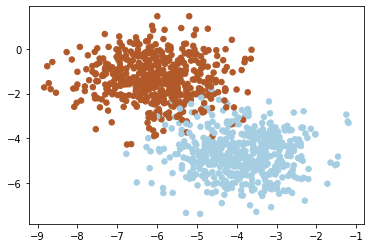

In [ ]:
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)

**without looking at the data we set aside 20% of the data as test data. The rest is used as training**

In [ ]:
N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = X[:, 0:N_tr]
x_tr = np.vstack((x_tr, np.ones(N_tr)))
y_tr = np.transpose(y[0:N_tr])
x_tst= X[:, N_tr:]
x_tst = np.vstack((x_tst, np.ones(N_tst)))
y_tst = np.transpose(y[N_tr:])

**Now we use the gradient descent algorithm to find ${\bf w^*}$**

In [ ]:
epsilon = 1e-3
d = np.shape(x_tr)[0]
w = np.zeros([d,1])             

Text(0, 0.5, 'loss')

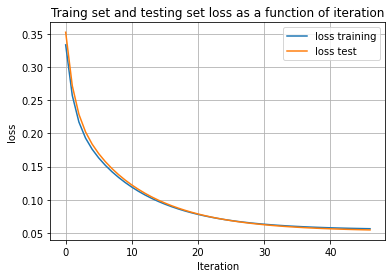

In [ ]:
temp = np.matmul(np.transpose(w), x_tr )
alpha = 0.01
E_train = []
E_test = []
i_step = 0
Convergence_flag = 1
while Convergence_flag:
  gradient = 1/N_tr * np.sum((x_tr * (np.matmul(np.transpose(w), x_tr ) - y_tr)), axis=1)
  gradient = gradient.reshape(d,1)
  w_new = w  - alpha*gradient
  if np.linalg.norm(w_new-w) <= epsilon:
    Convergence_flag = 0
  w = 1.0 * w_new
  temp = np.square(np.matmul(np.transpose(w), x_tr ) - y_tr)
  E_tr = 1/N_tr * np.sum(temp)
  E_train = np.append(E_train, E_tr ) 
  E_ts = 1/N_tst * np.sum(np.square((np.matmul(np.transpose(w), x_tst ) - y_tst)))
  E_test = np.append(E_test, E_ts ) 
plt.figure()
plt.plot(E_train, label='loss training')
plt.plot(E_test, label='loss test' )
plt.legend()
plt.grid()
plt.title('Traing set and testing set loss as a function of iteration')
plt.xlabel('Iteration')
plt.ylabel('loss')

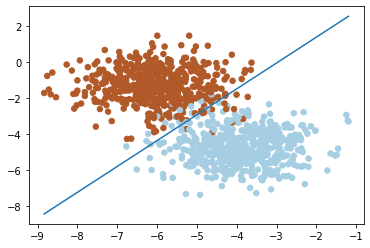

In [ ]:
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)
xx = np.linspace(np.min(X[0, :]),np.max(X[0, :]),100)
yy = -w[0]/w[1]*xx + (0.5 - w[2])/w[1]
plt.plot(xx,yy)

# Problem 1 (25 points)
Use the data set given below to classify the data with the following parameter


*   Loss function: Logistic regression
*   method for finfing the minmum: Gradient Descent

Remember to set asside 20% of your data as test data. 

The output of your program shouldne 


1.   (5 points) Classifier parameter ${\bf w}$ 
2.   (5 points) A plot of the data and classified regions similar to the one that is presented above 
3.   (5 points) A plot logistic regression loss for training and test data as a function of iteration number
4.   (5 points) A plot quadratic loss function for training and test data as a function of iteration number
5.   (5 points) You observe that the quadratic and logistic loss function are different. Change the parameter  ```random_state=1001``` in the code above both for the logistic regression that you solved and the quadratic solution that is provided in this HW. See how the loss changes and how the classification regions change. What can you say about the difference between these two classifiers. 




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
N = 1000
X, y = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std= 1,random_state=1001)
X = np.transpose(X)

## Next code visualizes the data
You are welcome to use this code. You are not required to use this data. 

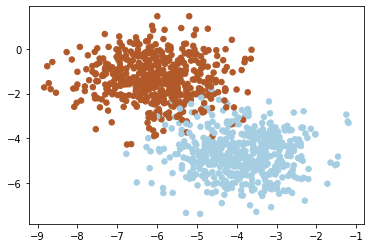

In [ ]:
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)

In [ ]:
N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = X[:, 0:N_tr]
x_tr = np.vstack((x_tr, np.ones(N_tr)))
y_tr = np.transpose(y[0:N_tr])
x_tst= X[:, N_tr:]
x_tst = np.vstack((x_tst, np.ones(N_tst)))
y_tst = np.transpose(y[N_tr:])

 W values are: 
[[-1.4533017 ]
 [ 2.41129419]
 [-0.06824698]]
 
 LOSS VS ITERATIONS GRAPH 
 


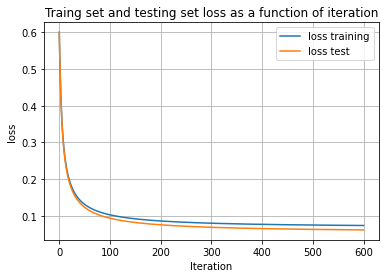

In [ ]:
# SOLUTION 

epsilon = 1e-3
d = np.shape(x_tr)[0]
w = np.zeros([d,1])  


temp = np.matmul(np.transpose(w), x_tr )
alpha = 0.1
E_train = []
E_test = []
i_step = 0
Convergence_flag = 1
while Convergence_flag:
  #################################
  # implemented the gradient descent for log loss.
  
  g_new = 1 / (1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tr))))
  gradient = 1/N_tr * np.sum( ( g_new - y_tr) * x_tr, axis=1)
  
  #################################
  
  gradient = gradient.reshape(d,1)
  w_new = w  - alpha*gradient
  if np.linalg.norm(w_new-w) <= epsilon:
    Convergence_flag = 0
  w = 1.0 * w_new

  #########################################################
  # changed the errors note: log loss gives the loss values, but if using
  # sigmoid in square means it will give same error value but will go
  # more in loss.
  #temp = np.square((1 / (1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tr)))) )- y_tr)
  temp = y_tr * np.log(1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tr)))) + \
  (1 - y_tr) *  np.log(1/1 + np.exp((np.matmul( np.transpose(w), x_tr))))
  E_tr = 1/N_tr * np.sum(temp)
  E_train = np.append(E_train, E_tr ) 
  E_ts = 1/N_tst * np.sum(y_tst * np.log(1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tst))))\
  +  (1 - y_tst) *  np.log(1 + np.exp( (np.matmul( np.transpose(w), x_tst)))))
  #E_ts = 1/N_tst * np.sum(np.square((1 / (1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tst)))) ) - y_tst))
  E_test = np.append(E_test, E_ts ) 
  #########################################################

  # temp = np.square(np.matmul(np.transpose(w), x_tr ) - y_tr)
  # E_tr_1 = 1/N_tr * np.sum(temp)
  # E_train_1 = np.append(E_train_1, E_tr_1 ) 
  # E_ts_1 = 1/N_tst * np.sum(np.square((np.matmul(np.transpose(w), x_tst ) - y_tst)))
  # E_test_1 = np.append(E_test_1, E_ts_1 ) 

# PART-3 LOSS VS ITERATIONS  PLOT
plt.figure()
plt.plot(E_train, label='loss training')
plt.plot(E_test, label='loss test' )
plt.legend()
plt.grid()
plt.title('Traing set and testing set loss as a function of iteration')
plt.xlabel('Iteration')
plt.ylabel('loss')


# PART -1 W CLASSIFIER POINTS
print(" W values are: ")
print(w)
print(" ")
print(" LOSS VS ITERATIONS GRAPH ")
print(" ")

 GRAPH OF CALSSIFIED REGIONS 


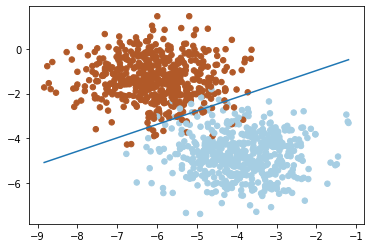

In [ ]:
# PART - 2 DATA AND CLASSIFIED REGIONS LOGISTIC REGRESSION

print(" GRAPH OF CALSSIFIED REGIONS ")
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)
xx = np.linspace(np.min(X[0, :]),np.max(X[0, :]),100)
yy = -w[0]/w[1]*xx + (0.5 - w[2])/w[1]
plt.plot(xx,yy)

Weights for quadratic loss are:
[[-0.36978731]
 [-0.82944133]
 [-0.63596378]]
 


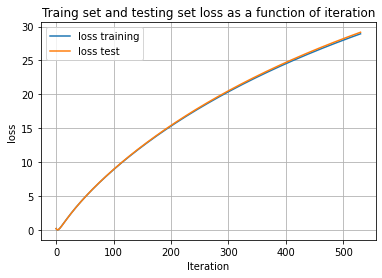

In [ ]:
# PART-4 QUADRATIC LOSS VS ITERATIONS PLOT
epsilon = 1e-3
d = np.shape(x_tr)[0]
w = np.zeros([d,1])

temp = np.matmul(np.transpose(w), x_tr )
alpha = 0.01
E_train = []
E_test = []
i_step = 0
gradient = 0
Convergence_flag = 1
while Convergence_flag:
  g_new = 1 / (1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tr))))
  gradient = 1/N_tr * np.sum( ( g_new - y_tr) * x_tr, axis=1)
  # gradient = 1/N_tr * np.sum((x_tr * (np.matmul(np.transpose(w), x_tr ) - y_tr)), axis=1)
  gradient = gradient.reshape(d,1)
  w_new = w  - alpha*gradient
  if np.linalg.norm(w_new-w) <= epsilon:
    Convergence_flag = 0
  w = 1.0 * w_new
  temp = np.square(np.matmul(np.transpose(w), x_tr ) - y_tr)
  E_tr = 1/N_tr * np.sum(temp)
  E_train = np.append(E_train, E_tr ) 
  E_ts = 1/N_tst * np.sum(np.square((np.matmul(np.transpose(w), x_tst ) - y_tst)))
  E_test = np.append(E_test, E_ts ) 
plt.figure()
plt.plot(E_train, label='loss training')
plt.plot(E_test, label='loss test' )
plt.legend()
plt.grid()
plt.title('Traing set and testing set loss as a function of iteration')
plt.xlabel('Iteration')
plt.ylabel('loss')
print("Weights for quadratic loss are:")
print(w)
print(" ")

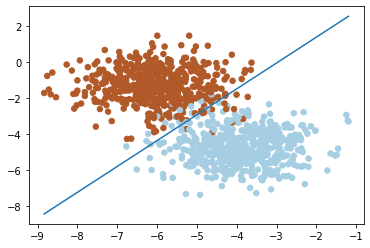

In [ ]:
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)
xx = np.linspace(np.min(X[0, :]),np.max(X[0, :]),100)
yy = -w[0]/w[1]*xx + (0.5 - w[2])/w[1]
plt.plot(xx,yy)

In [ ]:
'''
PART - 5
The difference between quadratic loss vs logistic loss
is that the log loss will try to indicate how close is the prediction probability
is to the acutal values and will try to segregate labels according to the values
generated and ranging them in between 0 and 1, so as seen in the graphs it tries
to segregate the classes completely.

In quadratic loss, as the loss is calculated by subtracting the predicted with actual
and then taking the mean. It consideres both the classes while generating the linear decision boundary.

Secondly, minimizing sum of squared errors leads to unbiased estimates of true probabilities. 
Here you do not desire unbiased estimates, because to have that estimates can be negative or greater than one.
To properly constrain estimates requires one to get slightly biased estimates on the proabibility scale.

Moreover, when increaing the value of epsilion, the iterations are taking lot of time because it has to check
a lot of cases.
so the best result will be upto 1e-5.
at last with quadratic loss increase with increase in iterations whereas loss decerease in log loss.
'''

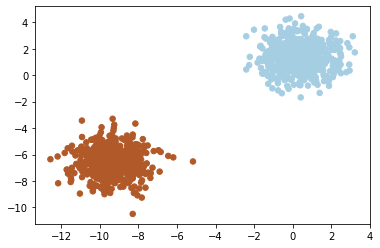

In [ ]:
# PART-5  CHANGING THE RANDOM STATE FOR BOTH THE QUADRATIC AND LOSS FUNCTION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# CHANGING THE RANDOM STATE  FROM 1001 TO 101
N = 1000
X, y = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std= 1,random_state=101)
X = np.transpose(X)

plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)

N_tr = int(N*0.8)
N_tst = N-N_tr
x_tr = X[:, 0:N_tr]
x_tr = np.vstack((x_tr, np.ones(N_tr)))
y_tr = np.transpose(y[0:N_tr])
x_tst= X[:, N_tr:]
x_tst = np.vstack((x_tst, np.ones(N_tst)))
y_tst = np.transpose(y[N_tr:])

W values are:
[[-0.40213703]
 [-1.40372509]
 [-2.87508834]]
 
 LOSS VS ITERATIONS GRAPH
 


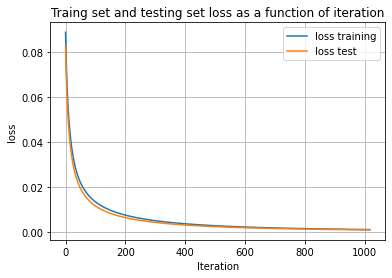

In [ ]:
###########################################################
# LOGISTIC LOSS
###########################################################

epsilon = 1e-3
d = np.shape(x_tr)[0]
w = np.zeros([d,1])  

temp = np.matmul(np.transpose(w), x_tr )
alpha = 0.1
E_train = []
E_test = []
E_train_1 = []
E_test_1 = []
i_step = 0
Convergence_flag = 1

while Convergence_flag:

  #########################################################
  # implemented the gradient descent for log loss.
  
  g_new = 1 / (1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tr))))
  gradient = 1/N_tr * np.sum( ( g_new - y_tr) * x_tr, axis=1)
  
  #########################################################
  gradient = gradient.reshape(d,1)
  w_new = w  - alpha*gradient
  if np.linalg.norm(w_new-w) <= epsilon:
    Convergence_flag = 0
  w = 1.0 * w_new
  temp = np.square((1 / (1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tr)))) )- y_tr)
  E_tr = 1/N_tr * np.sum(temp)
  E_train = np.append(E_train, E_tr ) 
  E_ts = 1/N_tst * np.sum(np.square((1 / (1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tst)))) ) - y_tst))
  E_test = np.append(E_test, E_ts ) 

# PART-3 LOSS VS ITERATIONS 
plt.figure()
plt.plot(E_train, label='loss training')
plt.plot(E_test, label='loss test' )
plt.legend()
plt.grid()
plt.title('Traing set and testing set loss as a function of iteration')
plt.xlabel('Iteration')
plt.ylabel('loss')


# PART -1 W CLASSIFIER POINTS
print("W values are:")
print(w)
print(" ")
print(" LOSS VS ITERATIONS GRAPH")
print(" ")

 GRAPH OF CALSSIFIED REGIONS 


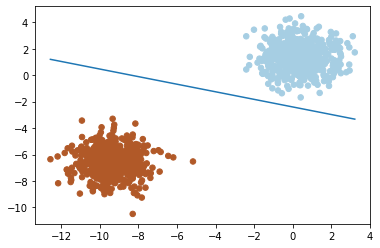

In [ ]:
print(" GRAPH OF CALSSIFIED REGIONS ")
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)
xx = np.linspace(np.min(X[0, :]),np.max(X[0, :]),100)
yy = -w[0]/w[1]*xx + (0.5 - w[2])/w[1]
plt.plot(xx,yy)

[[-0.40213703]
 [-1.40372509]
 [-2.87508834]]


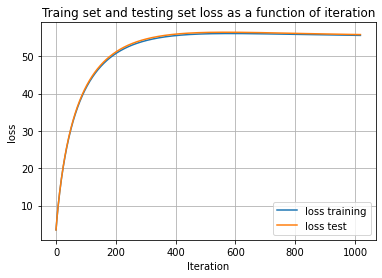

In [ ]:
###################################################
# QUADRATIC LOSS
###################################################

epsilon = 1e-3
d = np.shape(x_tr)[0]
w = np.zeros([d,1])

temp = np.matmul(np.transpose(w), x_tr )
alpha = 0.1
E_train_1 = []
E_test_1 = []
i_step = 0
Convergence_flag = 1
while Convergence_flag:
  # gradient = 1/N_tr * np.sum((x_tr * (np.matmul(np.transpose(w), x_tr ) - y_tr)), axis=1)
  # gradient = gradient.reshape(d,1)
  
  g_new = 1 / (1 + np.exp( -1 * (np.matmul( np.transpose(w), x_tr))))
  gradient = 1/N_tr * np.sum( ( g_new - y_tr) * x_tr, axis=1)
  gradient = gradient.reshape(d,1)
  w_new = w  - alpha*gradient
  if np.linalg.norm(w_new-w) <= epsilon:
    Convergence_flag = 0
  w = 1.0 * w_new
  temp1 = np.square(np.matmul(np.transpose(w), x_tr ) - y_tr)
  E_tr = 1/N_tr * np.sum(temp1)
  E_train_1 = np.append(E_train_1, E_tr ) 
  E_ts = 1/N_tst * np.sum(np.square((np.matmul(np.transpose(w), x_tst ) - y_tst)))
  E_test_1 = np.append(E_test_1, E_ts ) 
plt.figure()
plt.plot(E_train_1, label='loss training')
plt.plot(E_test_1, label='loss test' )
plt.legend()
plt.grid()
plt.title('Traing set and testing set loss as a function of iteration')
plt.xlabel('Iteration')
plt.ylabel('loss')
print(w)

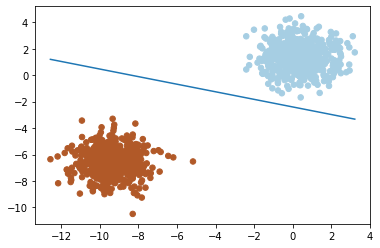

In [ ]:
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)
xx = np.linspace(np.min(X[0, :]),np.max(X[0, :]),100)
yy = -w[0]/w[1]*xx + (0.5 - w[2])/w[1]
plt.plot(xx,yy)